In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
df = pd.read_csv("credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Let us view all categorical field values as we might need to remove them / lable encode it later

In [8]:
for d in df.select_dtypes(include=['object']).columns.tolist():
    print(df[d].value_counts(),'\n')

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64 

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64 

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64 

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64 



**Visualization**


loan_status
0    25473
1     7108
Name: count, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

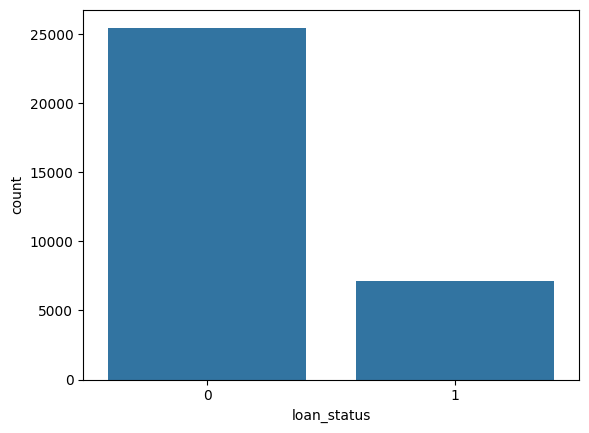

In [9]:
#showcase count of loan_status
print(df['loan_status'].value_counts())
sns.countplot(x ='loan_status', data = df)

In [10]:
person_age_income = (

    df.groupby(["person_age"])["loan_status"].value_counts().reset_index()

)

total_counts = person_age_income.groupby(["person_age"])["count"].transform("sum")

person_age_income["percentage"] = (person_age_income["count"] / total_counts) * 100

print(person_age_income)


     person_age  loan_status  count  percentage
0            20            0     13   86.666667
1            20            1      2   13.333333
2            21            0    857   69.731489
3            21            1    372   30.268511
4            22            0   2749   75.667492
5            22            1    884   24.332508
6            23            0   3056   78.580612
7            23            1    833   21.419388
8            24            0   2780   78.331924
9            24            1    769   21.668076
10           25            0   2362   77.774119
11           25            1    675   22.225881
12           26            0   1960   79.127977
13           26            1    517   20.872023
14           27            0   1694   79.232928
15           27            1    444   20.767072
16           28            0   1440   77.669903
17           28            1    414   22.330097
18           29            0   1344   79.668050
19           29            1    343   20

C:\Users\Dell PC\AppData\Roaming\Python\Python312\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


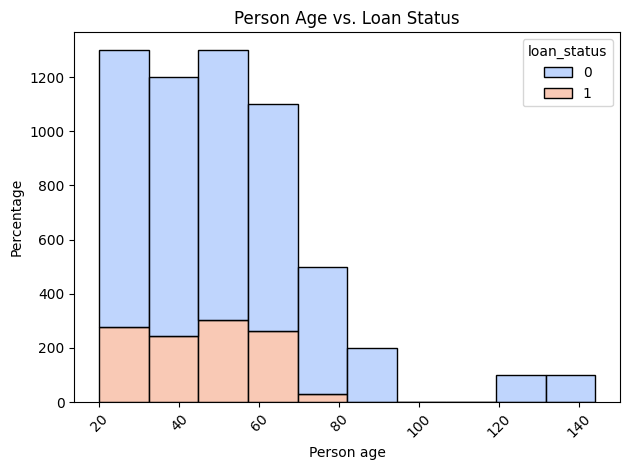

In [11]:
#comparing  loan status wt person's age

sns.histplot(

    data=person_age_income,

    x="person_age",

    weights="percentage",

    hue="loan_status",

    multiple="stack",

    palette="coolwarm",

)



plt.title("Person Age vs. Loan Status")

plt.xlabel("Person age")

plt.ylabel("Percentage")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


Person's Age has few outlier which we can visually see but lets observe them properly in later stage.

          loan_intent  loan_status  count
0   DEBTCONSOLIDATION            0   3722
1   DEBTCONSOLIDATION            1   1490
2           EDUCATION            0   5342
3           EDUCATION            1   1111
4     HOMEIMPROVEMENT            0   2664
5     HOMEIMPROVEMENT            1    941
6             MEDICAL            0   4450
7             MEDICAL            1   1621
8            PERSONAL            0   4423
9            PERSONAL            1   1098
10            VENTURE            0   4872
11            VENTURE            1    847


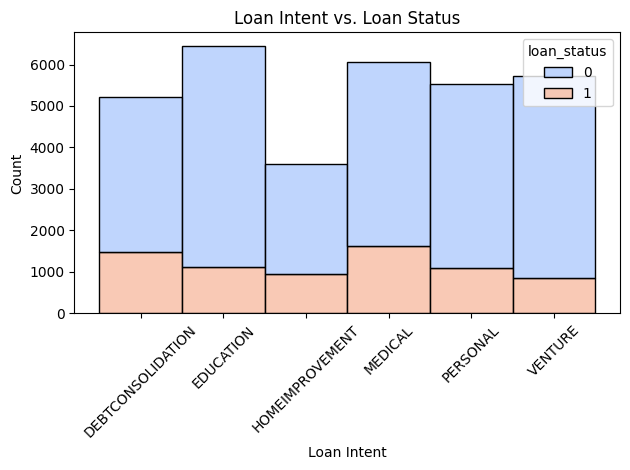

In [12]:
# Loan Intent 
intent_status_group = (

    df.groupby(["loan_intent"])["loan_status"].value_counts().reset_index()

)
print(intent_status_group)


sns.histplot(

    data=intent_status_group,

    x="loan_intent",

    weights="count",

    hue="loan_status",

    multiple="stack",

    palette="coolwarm",

)



plt.title("Loan Intent vs. Loan Status")

plt.xlabel("Loan Intent")

plt.ylabel("Count")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

   loan_grade  loan_status  count  percentage
0           A            0   9704   90.043611
1           A            1   1073    9.956389
2           B            0   8750   83.724046
3           B            1   1701   16.275954
4           C            0   5119   79.266027
5           C            1   1339   20.733973
6           D            1   2141   59.045780
7           D            0   1485   40.954220
8           E            1    621   64.419087
9           E            0    343   35.580913
10          F            1    170   70.539419
11          F            0     71   29.460581
12          G            1     63   98.437500
13          G            0      1    1.562500


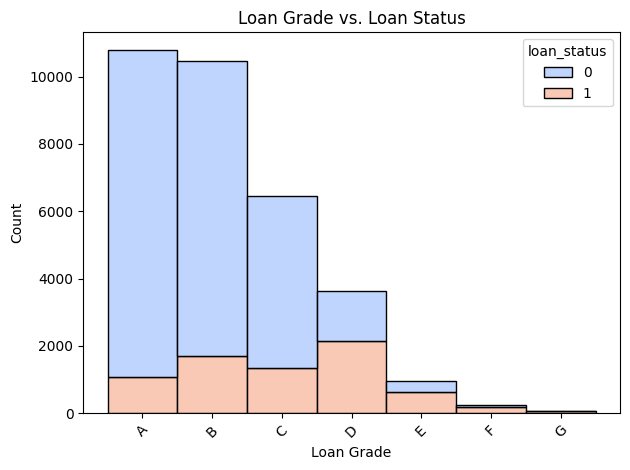

In [13]:
#Loan Grade
grade_status_group = (

    df.groupby(["loan_grade"])["loan_status"].value_counts().reset_index()

)

total_counts = grade_status_group.groupby("loan_grade")["count"].transform("sum")



grade_status_group["percentage"] = grade_status_group["count"] * 100 / total_counts
print(grade_status_group)
sns.histplot(

    data=grade_status_group,

    x="loan_grade",

    weights="count",

    hue="loan_status",

    multiple="stack",

    palette="coolwarm",

)



plt.title("Loan Grade vs. Loan Status")

plt.xlabel("Loan Grade")

plt.ylabel("Count")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

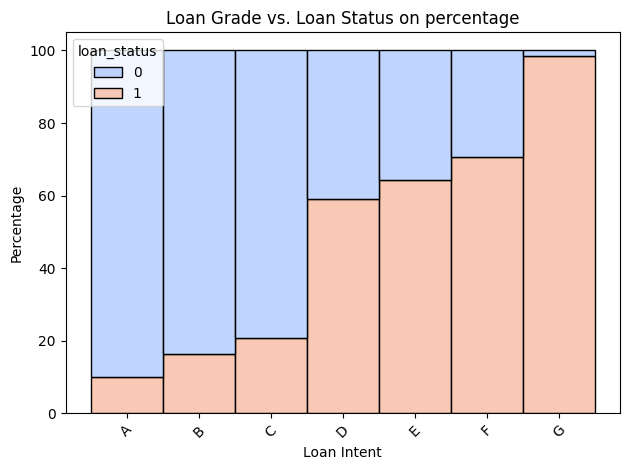

In [14]:
#comparing what is percentage of Loan Stauts in each Loan Grade
sns.histplot(

    data=grade_status_group,

    x="loan_grade",

    weights="percentage",

    hue="loan_status",

    multiple="stack",

    palette="coolwarm",

)



plt.title("Loan Grade vs. Loan Status on percentage")

plt.xlabel("Loan Intent")

plt.ylabel("Percentage")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

As we observer that as the Loan Grade changes( lets say decreases) percentage of Loan status to default increases

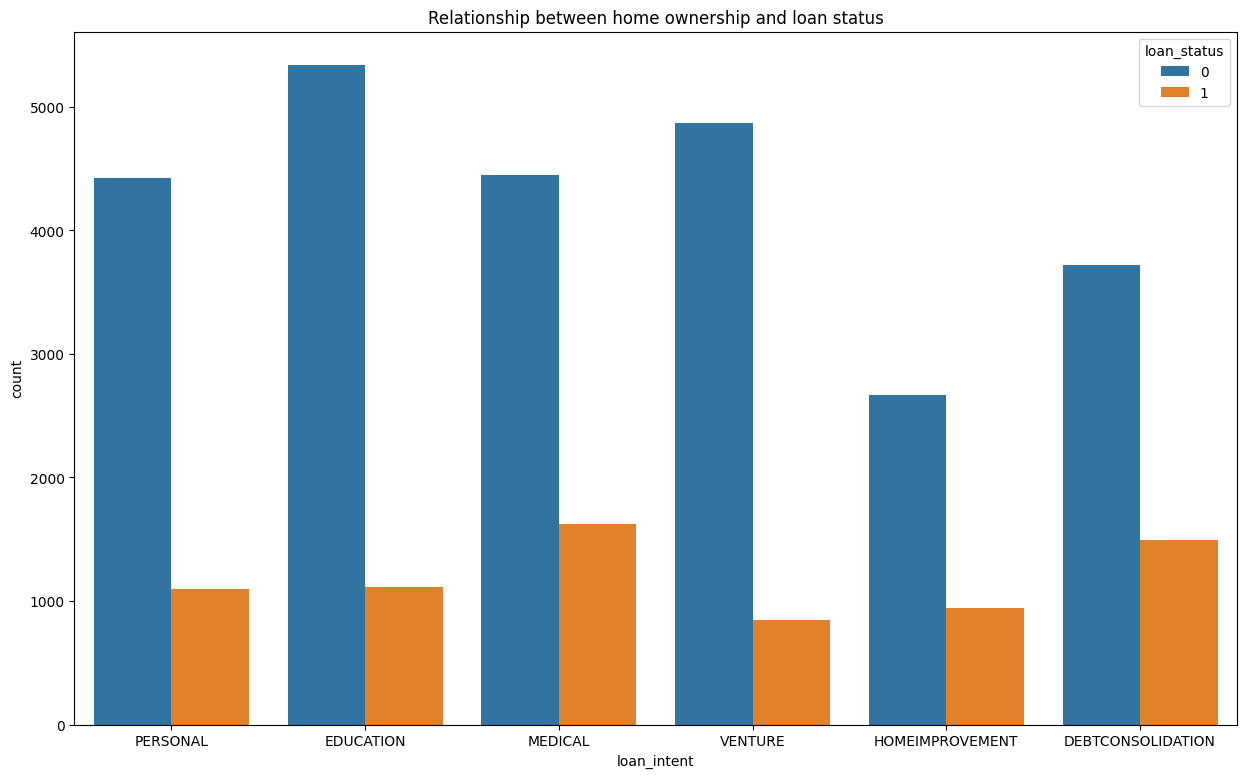

In [15]:
#lets understand what is majour purpose of loans
plt.figure(figsize=(15,9))
sns.countplot(data = df, x = 'loan_intent', hue = 'loan_status')
plt.title("Relationship between home ownership and loan status")
plt.show()

**Data Preprosessing**

In [16]:
# finding null values
print(df.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [17]:
#filling NA values with mean
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate']= df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [18]:
#finding duplicate records
df.duplicated().sum()

165

In [19]:
# removing records of person's age >100 as this are the extreem case scenarios or possibly data reading error
df = df.drop(df[df['person_age'] > 100].index)


In [20]:
# lets label encode all categorical variables (using label encoding to preserve)
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
levar = {}
# Iterate through all categorical columns
for col in df.select_dtypes(include=['object']).columns:
    LE = preprocessing.LabelEncoder()
    df[col] = LE.fit_transform(df[col])  # Perform label encoding
    levar[col] = dict(zip(LE.classes_, LE.transform(LE.classes_)))
    
for col, mapping in levar.items():
    print(f"Column: {col}")
    print(mapping,'\n')

Column: person_home_ownership
{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3} 

Column: loan_intent
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5} 

Column: loan_grade
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6} 

Column: cb_person_default_on_file
{'N': 0, 'Y': 1} 



<Axes: >

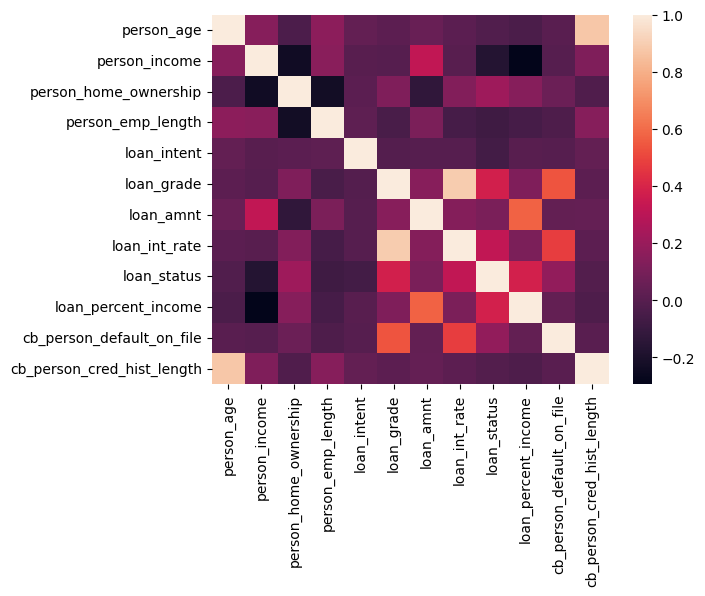

In [21]:
#lets identify the correlation between variables
sns.heatmap(df.corr())

**Model Training**

In [21]:
# Define features and target|
X = df.drop(columns=['loan_status'])  
y = df['loan_status']   

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# scaling dataset to 0 - 1
scaler = preprocessing.StandardScaler()



X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import metrics 
def print_metrics(model, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)
    
    print(report)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'ACCURACY OF THE MODEL: {accuracy:.2f}')
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5094
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6516
   macro avg       0.95      0.85      0.89      6516
weighted avg       0.93      0.93      0.93      6516

ACCURACY OF THE MODEL: 0.93


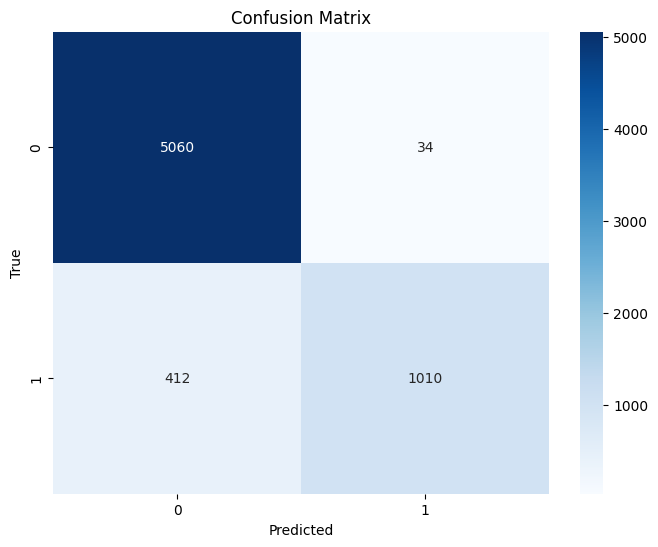

In [29]:
#Random Forest classifier
import pickle
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state=42)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print_metrics(clf,y_pred,y_test)

# Sauvegarder le modèle dans un fichier
#with open("credit_risk_model.pkl", "wb") as bestModel:
   # pickle.dump(clf, bestModel)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5094
           1       0.73      0.76      0.75      1422

    accuracy                           0.89      6516
   macro avg       0.83      0.84      0.84      6516
weighted avg       0.89      0.89      0.89      6516

ACCURACY OF THE MODEL: 0.89


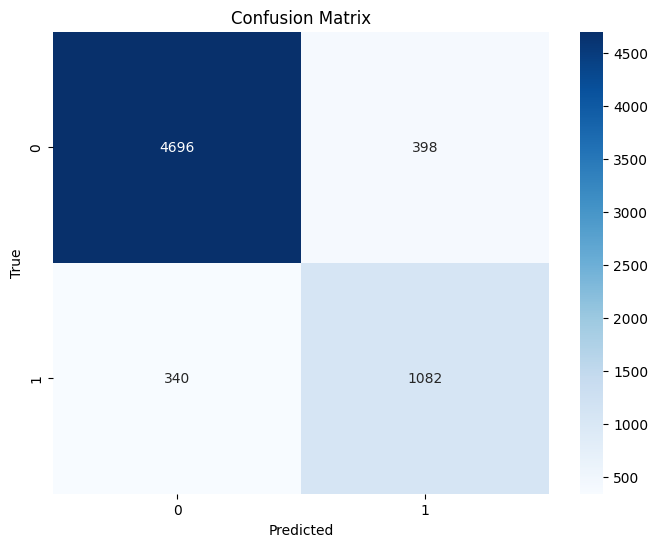

In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1] 

print_metrics(decision_tree, y_pred, y_prob)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5094
           1       0.85      0.51      0.63      1422

    accuracy                           0.87      6516
   macro avg       0.86      0.74      0.78      6516
weighted avg       0.87      0.87      0.86      6516

ACCURACY OF THE MODEL: 0.87


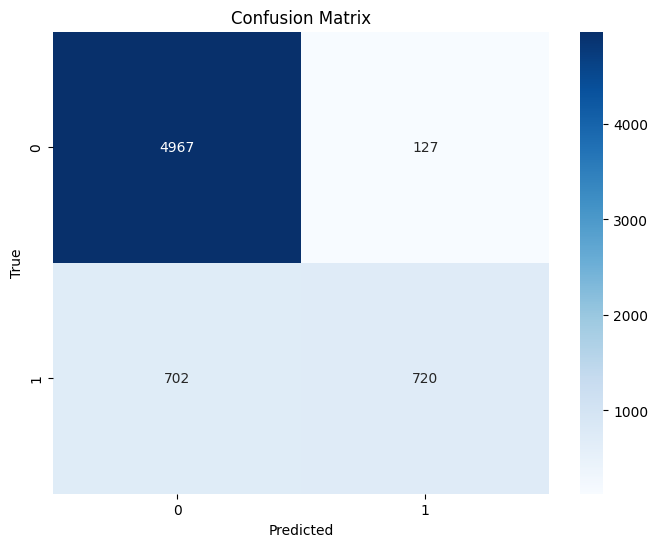

In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=6)
KNC.fit(X_train, y_train)

y_pred = KNC.predict(X_test)
y_prob = KNC.predict_proba(X_test)[:, 1] 

print_metrics(KNC, y_pred, y_prob)

   so  the   vets  classifier  is : Random Forest  with   accuracy of: 0.93 